# Customer Churn Analysis - Telecom Industry

## Unified Mentor Internship Project

**Author**: Ishak Islam  
**Internship ID**: UMID28072552431  
**Program**: Unified Mentor Internship  
**Date**: January 2026

---

### Project Overview
This notebook performs comprehensive analysis of customer churn in the telecom industry using the IBM Telco Customer Churn dataset.

### Objectives
1. Understand the factors contributing to customer churn
2. Identify patterns and trends in customer behavior
3. Provide actionable insights for reducing churn rate
4. Create visualizations for stakeholder communication

### Technologies Used
- **Python**: Primary programming language
- **Pandas**: Data manipulation and analysis
- **NumPy**: Numerical computations
- **Matplotlib**: Data visualization
- **Seaborn**: Statistical visualizations
- **Tableau**: Interactive dashboards (separate)

---

## 1. Setup and Data Loading

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Set figure defaults
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 3.0.0
NumPy version: 2.4.1


In [4]:
# Load the dataset
# Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

DATA_PATH = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("Dataset not found. Please download it first:")
    print("1. Visit: https://www.kaggle.com/datasets/blastchar/telco-customer-churn")
    print("2. Download and extract the ZIP file")
    print("3. Place 'WA_Fn-UseC_-Telco-Customer-Churn.csv' in the 'data/' folder")

Dataset loaded successfully!
Shape: 7,043 rows × 21 columns


## 2. Initial Data Exploration

In [5]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null 

In [8]:
# Statistical summary for numerical columns
print("Statistical Summary - Numerical Features:")
df.describe()

Statistical Summary - Numerical Features:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [ ]:
# Statistical summary for categorical columns
print("Statistical Summary - Categorical Features:")
df.describe(include=['object'])

In [ ]:
# Column names and data types
print("Column Names and Data Types:")
print("=" * 50)
for col in df.columns:
    print(f"{col:25} | {df[col].dtype:15} | {df[col].nunique():5} unique values")

## 3. Data Quality Assessment

In [9]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0]

if len(missing_data) == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_data.sort_values('Missing Percentage', ascending=False))

Missing Values Analysis:
No missing values found in the dataset!


In [10]:
# Check for duplicates
print("Duplicate Records Analysis:")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates / len(df) * 100):.2f}%")

# Check for duplicate customer IDs
duplicate_ids = df['customerID'].duplicated().sum()
print(f"\nDuplicate Customer IDs: {duplicate_ids}")

Duplicate Records Analysis:
Number of duplicate rows: 0
Percentage of duplicates: 0.00%

Duplicate Customer IDs: 0


In [11]:
# Check TotalCharges column (known to have issues)
print("TotalCharges Column Analysis:")
print("=" * 50)

# Check for non-numeric values
print(f"Data type: {df['TotalCharges'].dtype}")

# Try to convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values after conversion
nan_total_charges = df['TotalCharges'].isna().sum()
print(f"NaN values after conversion: {nan_total_charges}")

# Display rows with NaN TotalCharges
if nan_total_charges > 0:
    print(f"\nRows with missing TotalCharges (likely new customers with tenure=0):")
    display(df[df['TotalCharges'].isna()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

TotalCharges Column Analysis:
Data type: str
NaN values after conversion: 11

Rows with missing TotalCharges (likely new customers with tenure=0):


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


## 4. Data Cleaning and Preprocessing

In [12]:
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing TotalCharges
# For customers with tenure=0, TotalCharges should be 0 or equal to MonthlyCharges
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(df_clean['MonthlyCharges'])

print("Data Cleaning Steps:")
print("=" * 50)
print("1. Converted TotalCharges to numeric")
print("2. Filled missing TotalCharges with MonthlyCharges (for new customers)")
print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Missing values remaining: {df_clean.isnull().sum().sum()}")

Data Cleaning Steps:
1. Converted TotalCharges to numeric
2. Filled missing TotalCharges with MonthlyCharges (for new customers)

Cleaned dataset shape: (7043, 21)
Missing values remaining: 0


In [13]:
# Create binary encoding for Churn column
df_clean['Churn_Binary'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# Create tenure groups for analysis
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

df_clean['tenure_group'] = df_clean['tenure'].apply(tenure_group)

print("Feature Engineering:")
print("=" * 50)
print("1. Created Churn_Binary column (Yes=1, No=0)")
print("2. Created tenure_group column for better analysis")
print(f"\nTenure Group Distribution:")
print(df_clean['tenure_group'].value_counts())

Feature Engineering:
1. Created Churn_Binary column (Yes=1, No=0)
2. Created tenure_group column for better analysis

Tenure Group Distribution:
tenure_group
0-12 months     2186
25-48 months    1594
61+ months      1407
13-24 months    1024
49-60 months     832
Name: count, dtype: int64


In [14]:
# Categorize services
# Internet-related services
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count number of additional services
def count_services(row):
    count = 0
    for service in internet_services:
        if row[service] == 'Yes':
            count += 1
    return count

df_clean['num_services'] = df_clean.apply(count_services, axis=1)

print("\nNumber of Additional Services Distribution:")
print(df_clean['num_services'].value_counts().sort_index())


Number of Additional Services Distribution:
num_services
0    2219
1     966
2    1033
3    1118
4     852
5     571
6     284
Name: count, dtype: int64


## 5. Target Variable Analysis (Churn)

In [15]:
# Churn distribution
print("Churn Distribution:")
print("=" * 50)
churn_counts = df_clean['Churn'].value_counts()
churn_pct = df_clean['Churn'].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_pct.round(2)
})
print(churn_summary)

print(f"\nChurn Rate: {churn_pct['Yes']:.2f}%")

Churn Distribution:
       Count  Percentage
Churn                   
No      5174       73.46
Yes     1869       26.54

Churn Rate: 26.54%


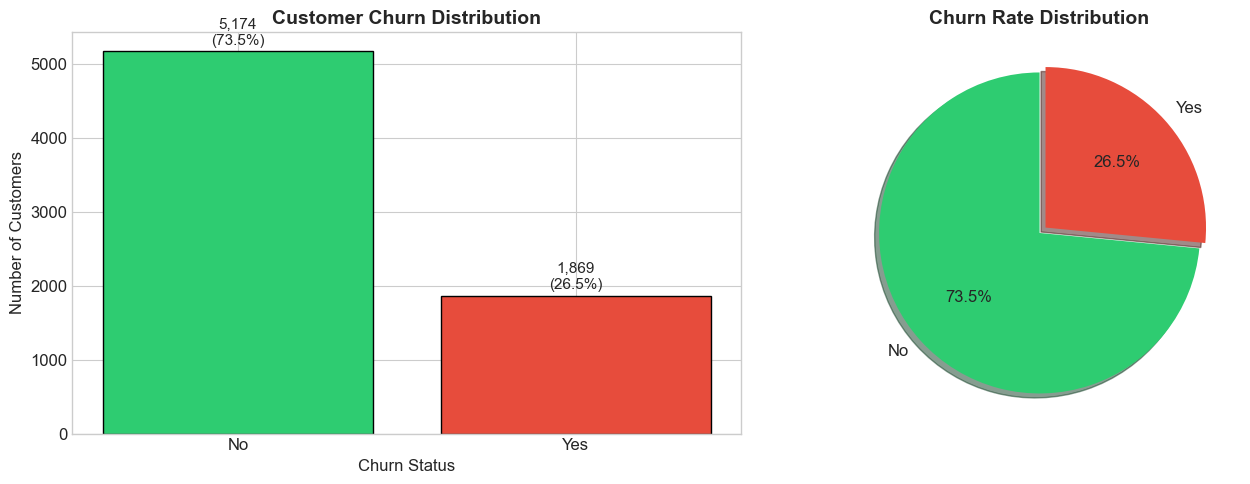


Visualization saved to: visualizations/01_churn_distribution.png


In [16]:
# Visualize Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
ax1 = axes[0]
bars = ax1.bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black')
ax1.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn Status')
ax1.set_ylabel('Number of Customers')

# Add value labels on bars
for bar, count, pct in zip(bars, churn_counts.values, churn_pct.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

# Pie chart
ax2 = axes[1]
explode = (0, 0.05)
ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
ax2.set_title('Churn Rate Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/01_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/01_churn_distribution.png")

## 6. Demographic Analysis

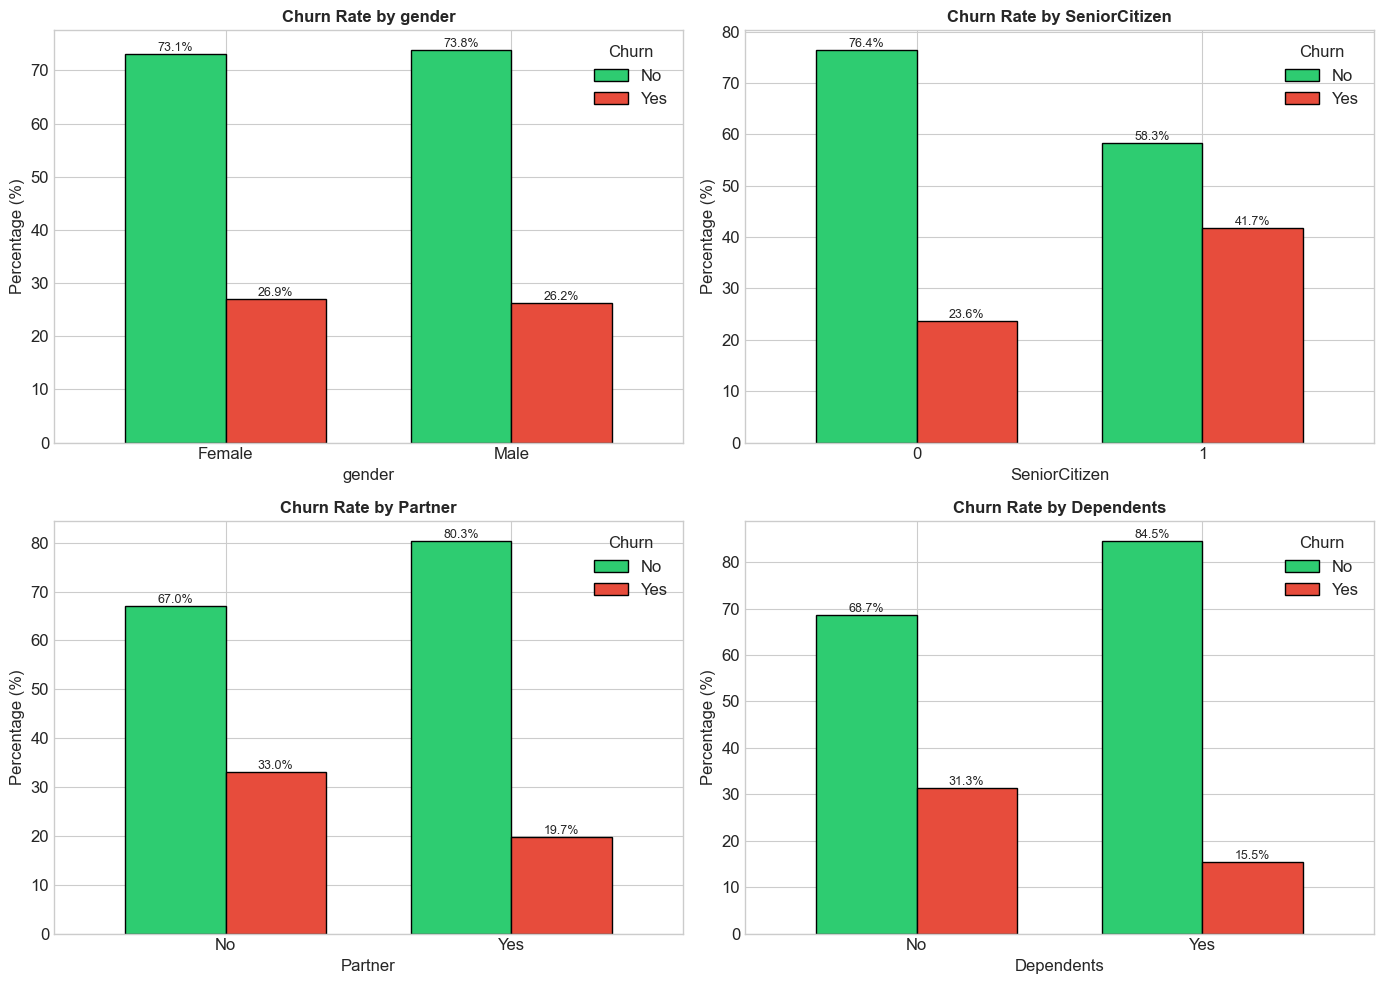


Visualization saved to: visualizations/02_demographic_analysis.png


In [17]:
# Demographic features
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(demographic_features):
    ax = axes[idx]
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    
    # Plot
    cross_tab.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)
    ax.set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Churn', loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.tight_layout()
plt.savefig('../visualizations/02_demographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/02_demographic_analysis.png")

In [18]:
# Detailed demographic analysis
print("Churn Rate by Demographics:")
print("=" * 50)

for feature in demographic_features:
    print(f"\n{feature}:")
    churn_by_feature = df_clean.groupby(feature)['Churn_Binary'].agg(['mean', 'count'])
    churn_by_feature.columns = ['Churn Rate', 'Count']
    churn_by_feature['Churn Rate'] = (churn_by_feature['Churn Rate'] * 100).round(2)
    print(churn_by_feature)

Churn Rate by Demographics:

gender:
        Churn Rate  Count
gender                   
Female       26.92   3488
Male         26.16   3555

SeniorCitizen:
               Churn Rate  Count
SeniorCitizen                   
0                   23.61   5901
1                   41.68   1142

Partner:
         Churn Rate  Count
Partner                   
No            32.96   3641
Yes           19.66   3402

Dependents:
            Churn Rate  Count
Dependents                   
No               31.28   4933
Yes              15.45   2110


## 7. Service Analysis

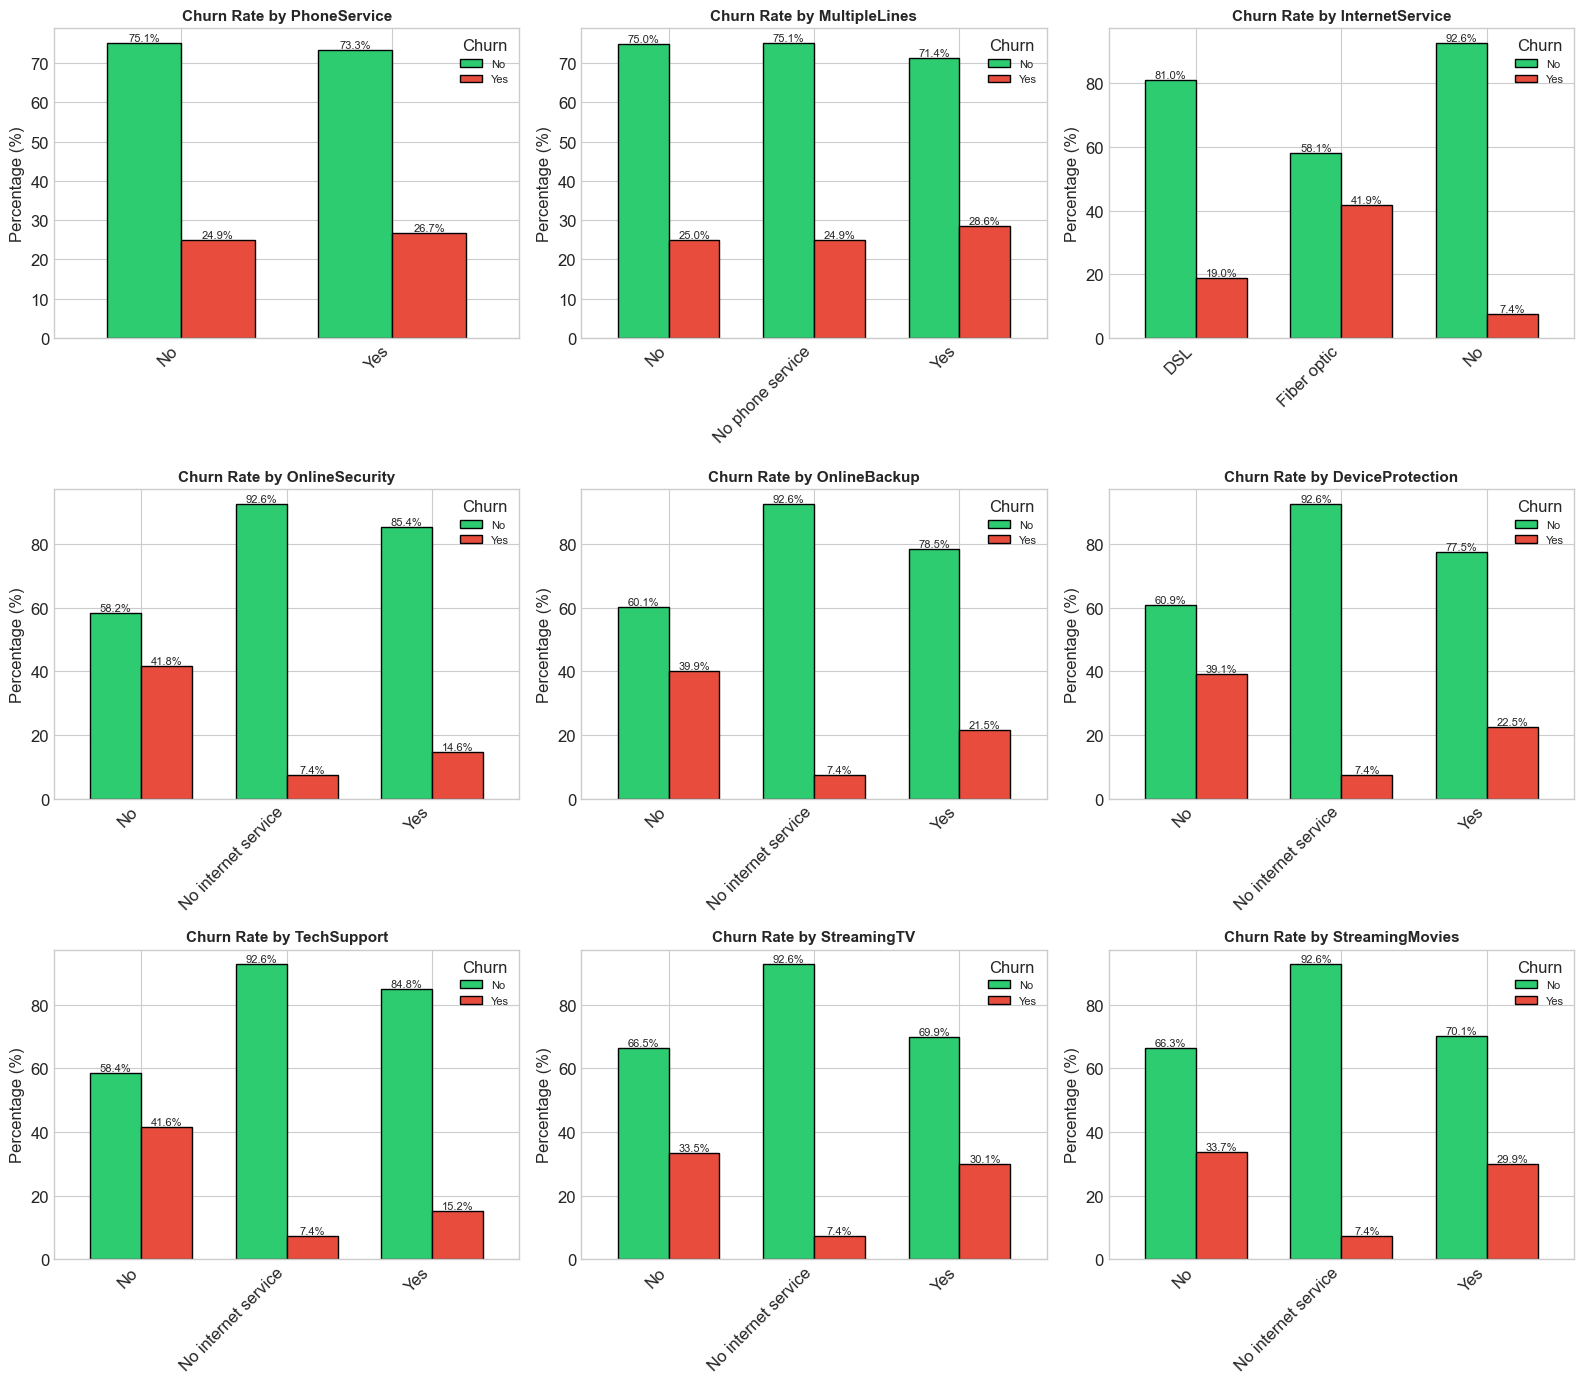


Visualization saved to: visualizations/03_service_analysis.png


In [19]:
# Service-related features
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for idx, feature in enumerate(service_features):
    ax = axes[idx]
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    
    # Plot
    cross_tab.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)
    ax.set_title(f'Churn Rate by {feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Churn', loc='upper right', fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=8)

plt.tight_layout()
plt.savefig('../visualizations/03_service_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/03_service_analysis.png")

In [20]:
# Internet Service Type Analysis
print("Churn Rate by Internet Service Type:")
print("=" * 50)

internet_churn = df_clean.groupby('InternetService').agg({
    'Churn_Binary': ['mean', 'count'],
    'MonthlyCharges': 'mean'
}).round(2)

internet_churn.columns = ['Churn Rate', 'Customer Count', 'Avg Monthly Charges']
internet_churn['Churn Rate'] = (internet_churn['Churn Rate'] * 100).round(2)
print(internet_churn)

Churn Rate by Internet Service Type:
                 Churn Rate  Customer Count  Avg Monthly Charges
InternetService                                                 
DSL                   19.00            2421                58.10
Fiber optic           42.00            3096                91.50
No                     7.00            1526                21.08


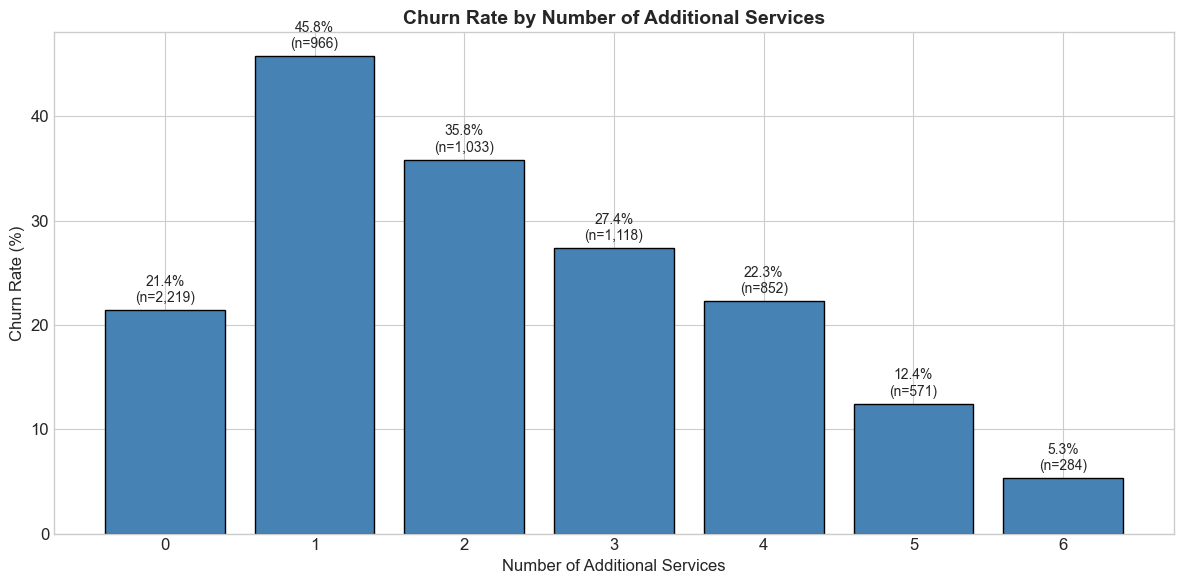


Key Insight: Customers with more additional services tend to have LOWER churn rates!


In [21]:
# Number of services vs Churn
fig, ax = plt.subplots(figsize=(12, 6))

service_churn = df_clean.groupby('num_services')['Churn_Binary'].mean() * 100
service_count = df_clean.groupby('num_services').size()

bars = ax.bar(service_churn.index, service_churn.values, color='steelblue', edgecolor='black')
ax.set_title('Churn Rate by Number of Additional Services', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Additional Services')
ax.set_ylabel('Churn Rate (%)')

# Add value labels
for bar, rate, count in zip(bars, service_churn.values, service_count.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{rate:.1f}%\n(n={count:,})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../visualizations/04_services_count_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insight: Customers with more additional services tend to have LOWER churn rates!")

## 8. Contract and Billing Analysis

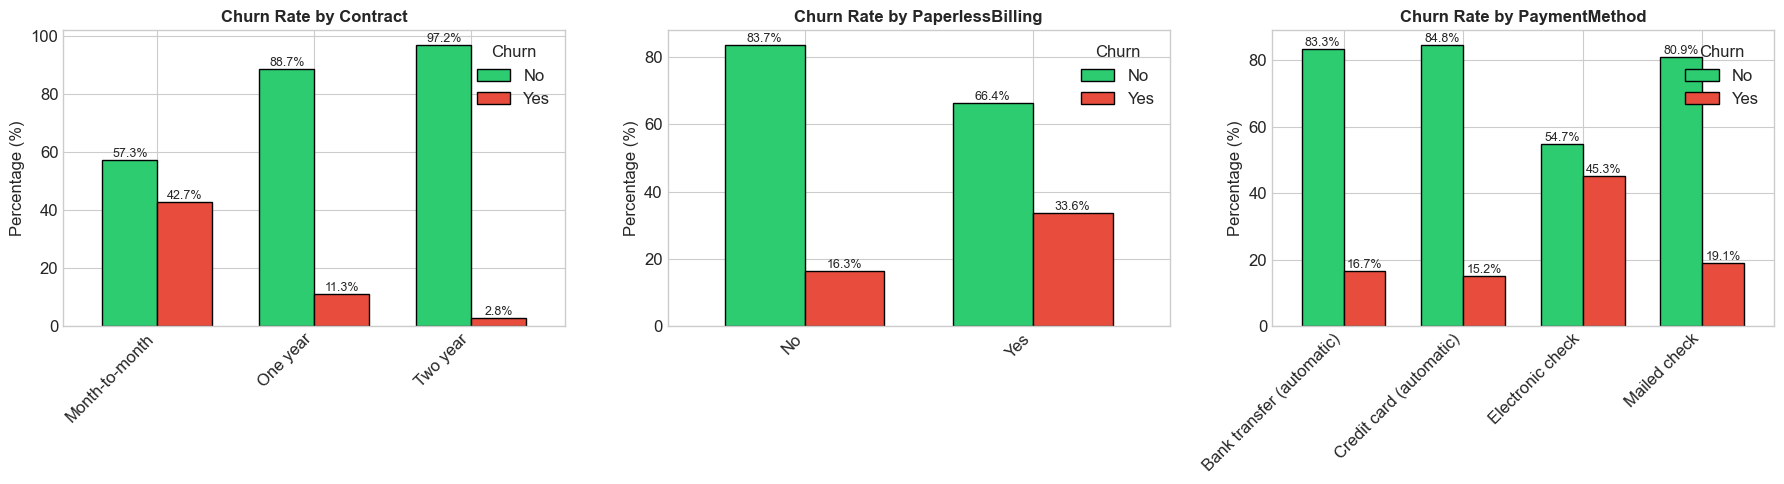


Visualization saved to: visualizations/05_contract_billing_analysis.png


In [22]:
# Contract-related features
contract_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(contract_features):
    ax = axes[idx]
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    
    # Plot
    cross_tab.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.7)
    ax.set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Churn', loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.tight_layout()
plt.savefig('../visualizations/05_contract_billing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/05_contract_billing_analysis.png")

In [23]:
# Detailed contract analysis
print("Churn Rate by Contract Type:")
print("=" * 50)

contract_analysis = df_clean.groupby('Contract').agg({
    'Churn_Binary': ['mean', 'count'],
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'tenure': 'mean'
}).round(2)

contract_analysis.columns = ['Churn Rate', 'Count', 'Avg Monthly', 'Avg Total', 'Avg Tenure']
contract_analysis['Churn Rate'] = (contract_analysis['Churn Rate'] * 100).round(2)
print(contract_analysis)

Churn Rate by Contract Type:
                Churn Rate  Count  Avg Monthly  Avg Total  Avg Tenure
Contract                                                             
Month-to-month       43.00   3875        66.40    1369.25       18.04
One year             11.00   1473        65.05    3032.64       42.04
Two year              3.00   1695        60.77    3707.19       56.74


In [24]:
# Payment method analysis
print("\nChurn Rate by Payment Method:")
print("=" * 50)

payment_analysis = df_clean.groupby('PaymentMethod').agg({
    'Churn_Binary': ['mean', 'count'],
    'MonthlyCharges': 'mean'
}).round(2)

payment_analysis.columns = ['Churn Rate', 'Count', 'Avg Monthly Charges']
payment_analysis['Churn Rate'] = (payment_analysis['Churn Rate'] * 100).round(2)
print(payment_analysis.sort_values('Churn Rate', ascending=False))


Churn Rate by Payment Method:
                           Churn Rate  Count  Avg Monthly Charges
PaymentMethod                                                    
Electronic check                45.00   2365                76.26
Mailed check                    19.00   1612                43.92
Bank transfer (automatic)       17.00   1544                67.19
Credit card (automatic)         15.00   1522                66.51


## 9. Financial Analysis (Charges and Tenure)

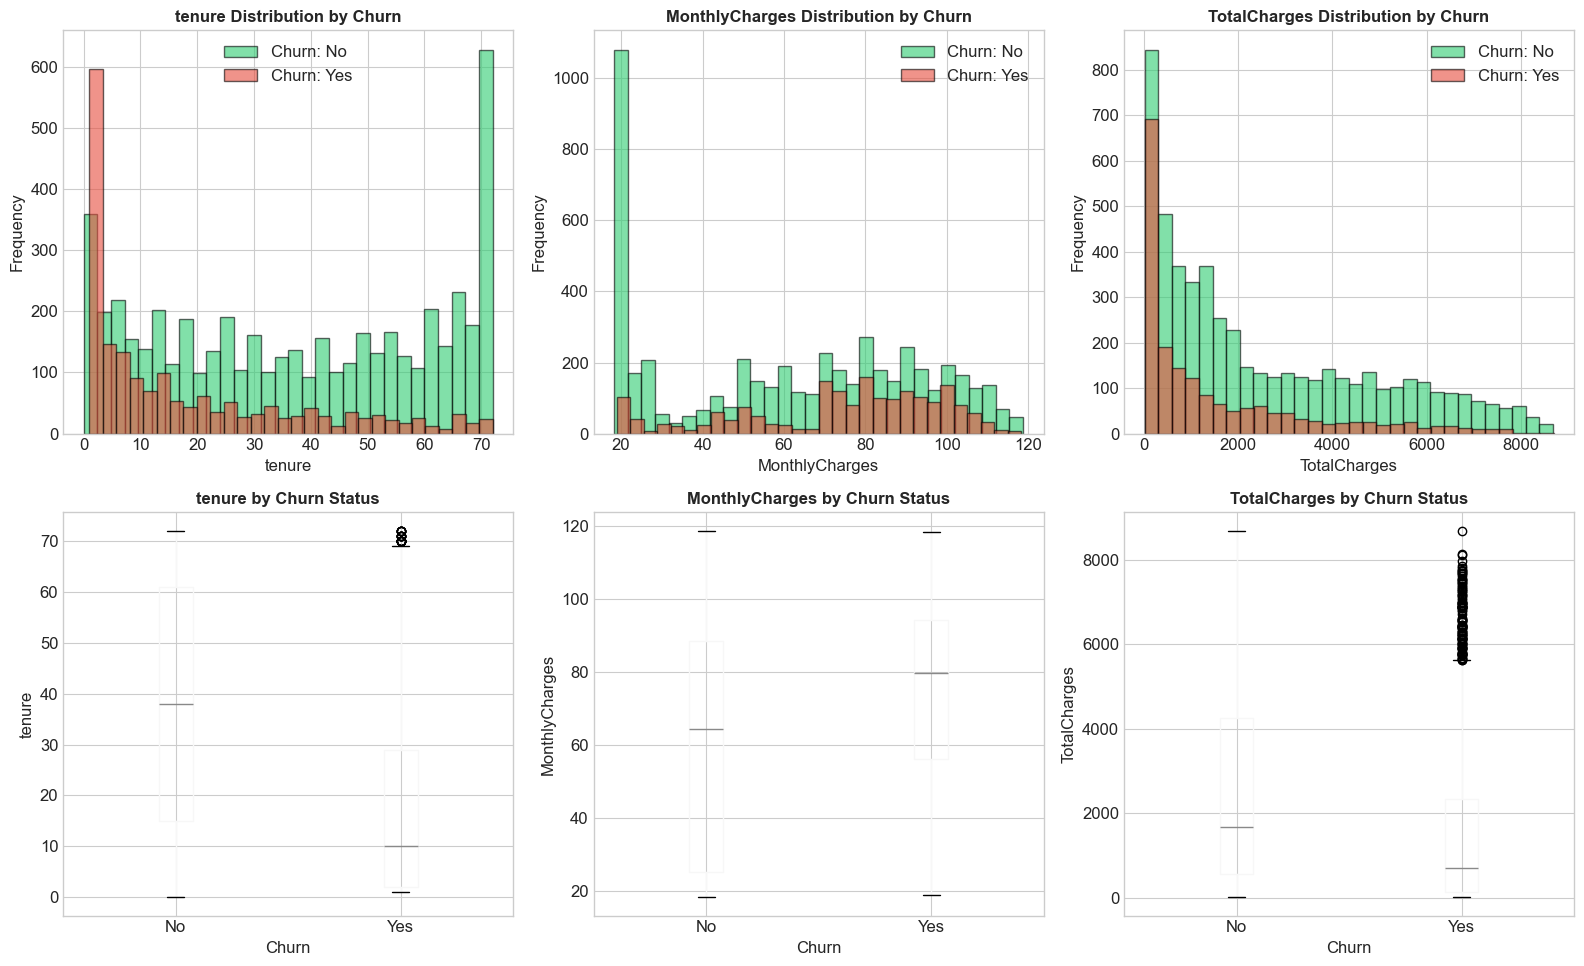


Visualization saved to: visualizations/06_financial_analysis.png


In [25]:
# Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for idx, feature in enumerate(numerical_features):
    # Histogram
    ax1 = axes[0, idx]
    for churn_status, color in zip(['No', 'Yes'], colors):
        data = df_clean[df_clean['Churn'] == churn_status][feature]
        ax1.hist(data, bins=30, alpha=0.6, label=f'Churn: {churn_status}', color=color, edgecolor='black')
    ax1.set_title(f'{feature} Distribution by Churn', fontsize=12, fontweight='bold')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # Box plot
    ax2 = axes[1, idx]
    df_clean.boxplot(column=feature, by='Churn', ax=ax2)
    ax2.set_title(f'{feature} by Churn Status', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Churn')
    ax2.set_ylabel(feature)
    plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig('../visualizations/06_financial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/06_financial_analysis.png")

In [26]:
# Statistical comparison of numerical features by churn status
print("Statistical Comparison by Churn Status:")
print("=" * 70)

for feature in numerical_features:
    churned = df_clean[df_clean['Churn'] == 'Yes'][feature]
    not_churned = df_clean[df_clean['Churn'] == 'No'][feature]
    
    print(f"\n{feature}:")
    print(f"  Churned customers:     Mean = {churned.mean():.2f}, Median = {churned.median():.2f}")
    print(f"  Non-churned customers: Mean = {not_churned.mean():.2f}, Median = {not_churned.median():.2f}")
    
    # T-test for statistical significance
    t_stat, p_value = stats.ttest_ind(churned, not_churned)
    print(f"  T-test p-value: {p_value:.4e} {'(Significant)' if p_value < 0.05 else '(Not Significant)'}")

Statistical Comparison by Churn Status:

tenure:
  Churned customers:     Mean = 17.98, Median = 10.00
  Non-churned customers: Mean = 37.57, Median = 38.00
  T-test p-value: 7.9991e-205 (Significant)

MonthlyCharges:
  Churned customers:     Mean = 74.44, Median = 79.65
  Non-churned customers: Mean = 61.27, Median = 64.43
  T-test p-value: 2.7066e-60 (Significant)

TotalCharges:
  Churned customers:     Mean = 1531.80, Median = 703.55
  Non-churned customers: Mean = 2550.00, Median = 1679.53
  T-test p-value: 2.0577e-63 (Significant)


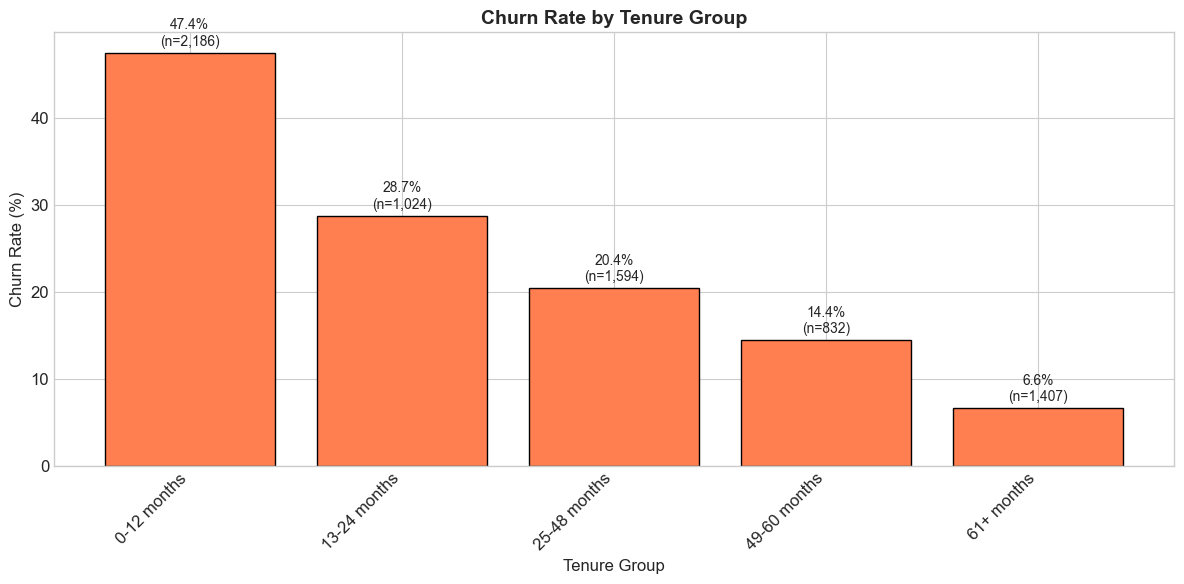


Key Insight: New customers (0-12 months) have the HIGHEST churn rate!


In [27]:
# Tenure group analysis
fig, ax = plt.subplots(figsize=(12, 6))

tenure_order = ['0-12 months', '13-24 months', '25-48 months', '49-60 months', '61+ months']
tenure_churn = df_clean.groupby('tenure_group')['Churn_Binary'].mean().reindex(tenure_order) * 100
tenure_count = df_clean.groupby('tenure_group').size().reindex(tenure_order)

bars = ax.bar(range(len(tenure_churn)), tenure_churn.values, color='coral', edgecolor='black')
ax.set_xticks(range(len(tenure_churn)))
ax.set_xticklabels(tenure_order, rotation=45, ha='right')
ax.set_title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Tenure Group')
ax.set_ylabel('Churn Rate (%)')

# Add value labels
for bar, rate, count in zip(bars, tenure_churn.values, tenure_count.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{rate:.1f}%\n(n={count:,})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../visualizations/07_tenure_churn_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Insight: New customers (0-12 months) have the HIGHEST churn rate!")

## 10. Correlation Analysis

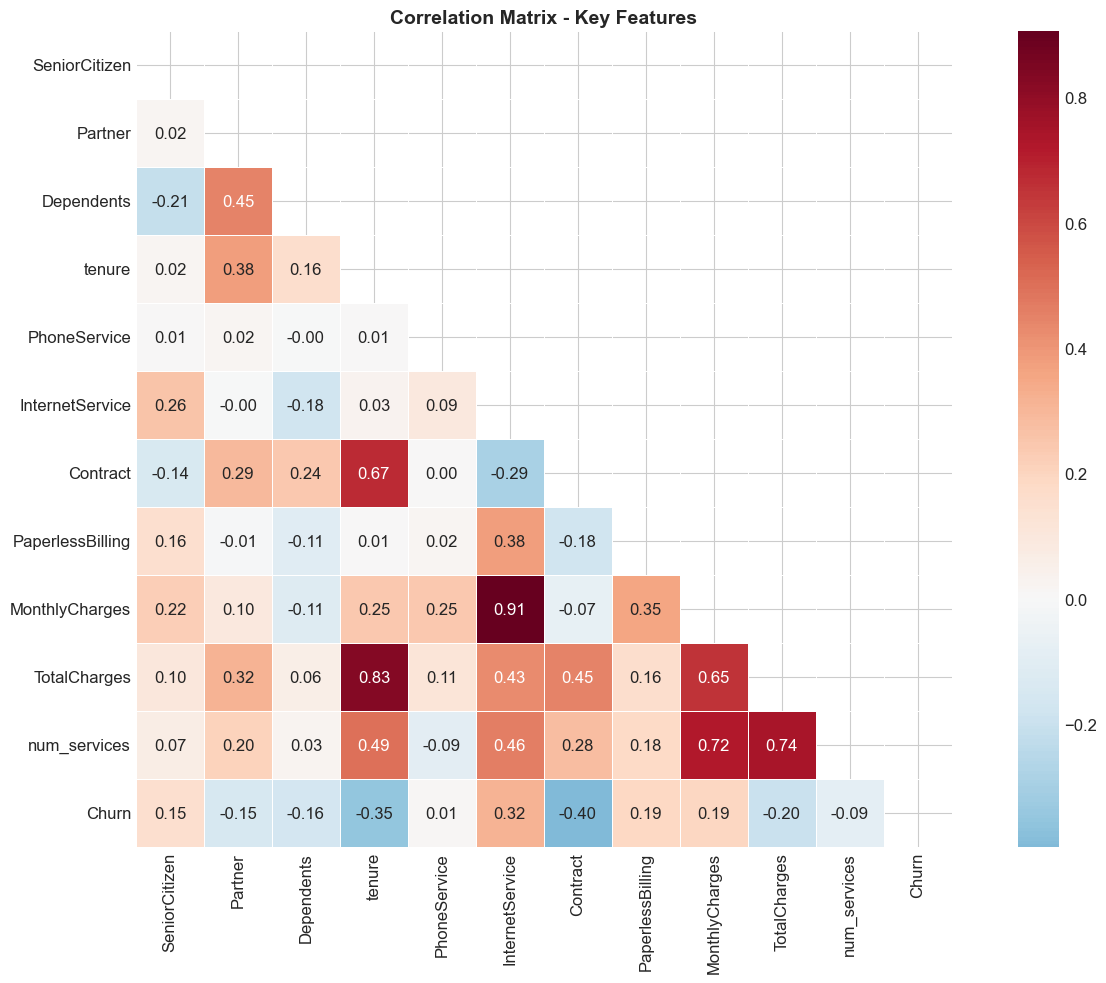


Visualization saved to: visualizations/08_correlation_matrix.png


In [28]:
# Create numerical encoding for categorical variables
df_encoded = df_clean.copy()

# Binary encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col == 'gender':
        df_encoded[col] = df_encoded[col].map({'Male': 1, 'Female': 0})
    else:
        df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

# Multi-category encoding
df_encoded['InternetService'] = df_encoded['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_encoded['Contract'] = df_encoded['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

# Select numerical columns for correlation
corr_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
             'InternetService', 'Contract', 'PaperlessBilling', 
             'MonthlyCharges', 'TotalCharges', 'num_services', 'Churn']

# Calculate correlation matrix
corr_matrix = df_encoded[corr_cols].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix - Key Features', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/08_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to: visualizations/08_correlation_matrix.png")

In [29]:
# Correlation with Churn
print("Correlation with Churn (sorted by absolute value):")
print("=" * 50)

churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
for feature, corr in churn_corr.items():
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{feature:20} | {corr:+.3f} | {direction}")

Correlation with Churn (sorted by absolute value):
Contract             | -0.397 | Negative
tenure               | -0.352 | Negative
InternetService      | +0.317 | Positive
TotalCharges         | -0.198 | Negative
MonthlyCharges       | +0.193 | Positive
PaperlessBilling     | +0.192 | Positive
Dependents           | -0.164 | Negative
SeniorCitizen        | +0.151 | Positive
Partner              | -0.150 | Negative
num_services         | -0.088 | Negative
PhoneService         | +0.012 | Positive


## 11. Key Insights and Findings

In [30]:
# Summary statistics
print("="*70)
print("CUSTOMER CHURN ANALYSIS - KEY FINDINGS")
print("="*70)

overall_churn = df_clean['Churn_Binary'].mean() * 100
print(f"\n1. OVERALL CHURN RATE: {overall_churn:.2f}%")
print(f"   - Total Customers: {len(df_clean):,}")
print(f"   - Churned Customers: {df_clean['Churn_Binary'].sum():,}")
print(f"   - Retained Customers: {(df_clean['Churn_Binary']==0).sum():,}")

print("\n2. HIGH-RISK CUSTOMER SEGMENTS:")
print("   - Month-to-month contracts: {:.1f}% churn rate".format(
    df_clean[df_clean['Contract']=='Month-to-month']['Churn_Binary'].mean()*100))
print("   - Fiber optic internet: {:.1f}% churn rate".format(
    df_clean[df_clean['InternetService']=='Fiber optic']['Churn_Binary'].mean()*100))
print("   - Electronic check payment: {:.1f}% churn rate".format(
    df_clean[df_clean['PaymentMethod']=='Electronic check']['Churn_Binary'].mean()*100))
print("   - New customers (0-12 months tenure): {:.1f}% churn rate".format(
    df_clean[df_clean['tenure']<=12]['Churn_Binary'].mean()*100))

print("\n3. LOW-RISK CUSTOMER SEGMENTS:")
print("   - Two-year contracts: {:.1f}% churn rate".format(
    df_clean[df_clean['Contract']=='Two year']['Churn_Binary'].mean()*100))
print("   - Customers with 4+ services: {:.1f}% churn rate".format(
    df_clean[df_clean['num_services']>=4]['Churn_Binary'].mean()*100))
print("   - Long-term customers (61+ months): {:.1f}% churn rate".format(
    df_clean[df_clean['tenure']>60]['Churn_Binary'].mean()*100))

print("\n4. FINANCIAL IMPACT:")
churned_revenue = df_clean[df_clean['Churn']=='Yes']['MonthlyCharges'].sum()
total_revenue = df_clean['MonthlyCharges'].sum()
print(f"   - Monthly revenue at risk: ${churned_revenue:,.2f}")
print(f"   - Percentage of total revenue at risk: {(churned_revenue/total_revenue)*100:.1f}%")

print("\n" + "="*70)

CUSTOMER CHURN ANALYSIS - KEY FINDINGS

1. OVERALL CHURN RATE: 26.54%
   - Total Customers: 7,043
   - Churned Customers: 1,869
   - Retained Customers: 5,174

2. HIGH-RISK CUSTOMER SEGMENTS:
   - Month-to-month contracts: 42.7% churn rate
   - Fiber optic internet: 41.9% churn rate
   - Electronic check payment: 45.3% churn rate
   - New customers (0-12 months tenure): 47.4% churn rate

3. LOW-RISK CUSTOMER SEGMENTS:
   - Two-year contracts: 2.8% churn rate
   - Customers with 4+ services: 16.2% churn rate
   - Long-term customers (61+ months): 6.6% churn rate

4. FINANCIAL IMPACT:
   - Monthly revenue at risk: $139,130.85
   - Percentage of total revenue at risk: 30.5%



## 12. Recommendations

In [31]:
print("="*70)
print("STRATEGIC RECOMMENDATIONS FOR REDUCING CHURN")
print("="*70)

recommendations = """
1. CONTRACT STRATEGY:
   - Incentivize customers to move from month-to-month to annual contracts
   - Offer discounts or benefits for longer contract commitments
   - Focus retention efforts on month-to-month customers early

2. NEW CUSTOMER RETENTION:
   - Implement special onboarding programs for new customers
   - Provide dedicated support during the first 12 months
   - Offer loyalty rewards after key milestones (3, 6, 12 months)

3. SERVICE BUNDLING:
   - Encourage customers to add more services (security, backup, etc.)
   - Create attractive bundle packages with discounted pricing
   - Customers with more services show significantly lower churn

4. PAYMENT METHOD OPTIMIZATION:
   - Reduce dependency on electronic check payments
   - Offer incentives for automatic payment methods
   - Consider convenience fees or discounts for preferred methods

5. FIBER OPTIC SERVICE IMPROVEMENT:
   - Investigate why fiber optic customers have higher churn
   - May be related to higher prices or service quality issues
   - Consider competitive pricing analysis

6. SENIOR CITIZEN SUPPORT:
   - Senior citizens show slightly higher churn rates
   - Develop targeted support and simplified service plans
   - Consider senior-friendly pricing packages

7. PROACTIVE RETENTION:
   - Implement early warning system for at-risk customers
   - Use predictive models to identify potential churners
   - Reach out before customers decide to leave
"""

print(recommendations)

STRATEGIC RECOMMENDATIONS FOR REDUCING CHURN

1. CONTRACT STRATEGY:
   - Incentivize customers to move from month-to-month to annual contracts
   - Offer discounts or benefits for longer contract commitments
   - Focus retention efforts on month-to-month customers early

2. NEW CUSTOMER RETENTION:
   - Implement special onboarding programs for new customers
   - Provide dedicated support during the first 12 months
   - Offer loyalty rewards after key milestones (3, 6, 12 months)

3. SERVICE BUNDLING:
   - Encourage customers to add more services (security, backup, etc.)
   - Create attractive bundle packages with discounted pricing
   - Customers with more services show significantly lower churn

4. PAYMENT METHOD OPTIMIZATION:
   - Reduce dependency on electronic check payments
   - Offer incentives for automatic payment methods
   - Consider convenience fees or discounts for preferred methods

5. FIBER OPTIC SERVICE IMPROVEMENT:
   - Investigate why fiber optic customers have higher 

## 13. Export Data for Tableau

In [32]:
# Export cleaned data for Tableau visualization
tableau_export = df_clean.copy()

# Save to CSV for Tableau
tableau_export.to_csv('../tableau/churn_data_for_tableau.csv', index=False)
print("Data exported for Tableau: tableau/churn_data_for_tableau.csv")

# Create summary tables for Tableau
# Churn by Contract
contract_summary = df_clean.groupby('Contract').agg({
    'Churn_Binary': ['sum', 'count', 'mean'],
    'MonthlyCharges': 'mean',
    'TotalCharges': 'sum'
}).round(2)
contract_summary.columns = ['Churned', 'Total', 'Churn_Rate', 'Avg_Monthly', 'Total_Revenue']
contract_summary.to_csv('../tableau/summary_by_contract.csv')

# Churn by Tenure Group
tenure_summary = df_clean.groupby('tenure_group').agg({
    'Churn_Binary': ['sum', 'count', 'mean'],
    'MonthlyCharges': 'mean'
}).round(2)
tenure_summary.columns = ['Churned', 'Total', 'Churn_Rate', 'Avg_Monthly']
tenure_summary.to_csv('../tableau/summary_by_tenure.csv')

# Churn by Services
services_summary = df_clean.groupby('num_services').agg({
    'Churn_Binary': ['sum', 'count', 'mean']
}).round(2)
services_summary.columns = ['Churned', 'Total', 'Churn_Rate']
services_summary.to_csv('../tableau/summary_by_services.csv')

print("\nSummary files exported for Tableau:")
print("  - tableau/summary_by_contract.csv")
print("  - tableau/summary_by_tenure.csv")
print("  - tableau/summary_by_services.csv")

Data exported for Tableau: tableau/churn_data_for_tableau.csv

Summary files exported for Tableau:
  - tableau/summary_by_contract.csv
  - tableau/summary_by_tenure.csv
  - tableau/summary_by_services.csv


---

## Project Completion

This analysis has provided comprehensive insights into customer churn patterns in the telecom industry.

### Files Generated:
1. **Visualizations** (in `visualizations/` folder)
2. **Tableau Data** (in `tableau/` folder)
3. **Documentation** (in `docs/` folder)

### Next Steps:
1. Create interactive Tableau dashboards using the exported data
2. Implement predictive modeling for churn prediction
3. Develop actionable business strategies based on findings

---

**Author:** Ishak Islam  
**Internship ID:** UMID28072552431  
**Program:** Unified Mentor Internship  
**Technologies:** Python, Pandas, NumPy, Matplotlib, Seaborn, Tableau